In [1]:
import torch
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
if torch.cuda.is_available():
    print("Running on GPU:", torch.cuda.get_device_name(0))
else:
    print("Running on CPU")

Running on GPU: NVIDIA GeForce GTX 1080 Ti


In [2]:
!pip install --upgrade diffusers transformers -q

In [3]:
!pip install accelerate -q

In [5]:
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import cv2

In [6]:
class txtimg:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "CompVis/stable-diffusion-v1-4"
    image_gen_size = (397,397)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt2"
    prompt_dataset_size = 6
    prompt_max_length = 12

In [7]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [9]:
image_gen_model = StableDiffusionPipeline.from_pretrained(
    txtimg.image_gen_model_id, torch_dtype=torch.float16,
    revision="fp16", guidance_scale=9
)
image_gen_model = image_gen_model.to(txtimg.device)

vae/diffusion_pytorch_model.safetensors not found
Keyword arguments {'guidance_scale': 9} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/kunuruabhishek/anaconda3/envs/pytorch/lib/python3.7/site-packages/transformers/models/clip/feature_extraction_clip.py:31: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  FutureWarning,
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [10]:
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps=txtimg.image_gen_steps,
        generator=txtimg.generator,
        guidance_scale=txtimg.image_gen_guidance_scale
    ).images[0]
    
    image = image.resize(txtimg.image_gen_size)
    return image

  0%|          | 0/35 [00:00<?, ?it/s]

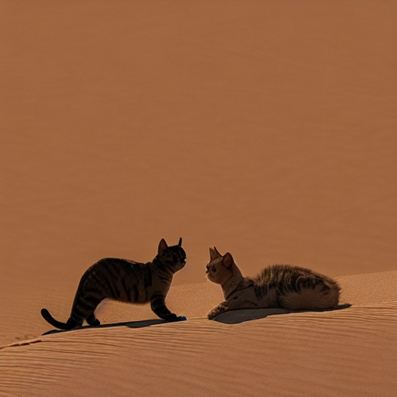

In [11]:
generate_image("Two cat in sahara desert ", image_gen_model)